<a href="https://colab.research.google.com/github/therealellam/CORE_ML_WK1/blob/main/DSC_CORE_MOD2_WK1__ML_Bellah_Ellam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question


You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

# b) Understanding the context 

An explanation of the ranking procedure is available here: https://www.fifa.com/fifa-world-ranking/procedure/men.html

A more detailed explanation and history of the rankings is available here:https://en.wikipedia.org/wiki/FIFA_World_Rankings

## 2. Reading the Data

In [3]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Loading the Dataset

df=pd.read_csv('/content/results.csv')

## 3. Checking the Data

In [5]:
# Determining the no. of records in our dataset
df.shape

(40839, 9)

In [6]:
# Previewing the top of our dataset
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
# Previewing the bottom of our dataset
df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [8]:
# Checking whether each column has an appropriate datatype
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

## 5. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


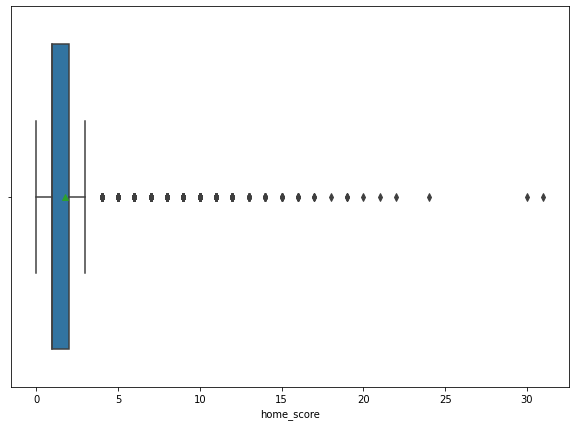

In [9]:
# Checking for Outliers
#
plt.figure(figsize=(10, 7))
sns.boxplot(df["home_score"], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


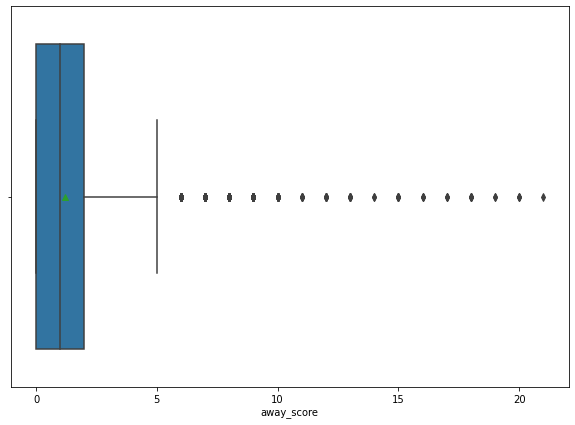

In [10]:
# Checking for Outliers
#
plt.figure(figsize=(10, 7))
sns.boxplot(df["away_score"], showmeans=True)

In [11]:
# Checking for Anomalies
#

In [12]:
# Identifying the Missing Data
#
df.isnull().values.any()

False

In [13]:
# Dealing with the Missing Data
#df.isnull().sum()

#df.dropna(inplace=True)
#df.isnull().sum()

In [14]:
# More data cleaning procedures
#
#checking data for duplicates
df.duplicated().values.any()

False

## 6. Exploratory Analysis

In [15]:
import datetime

df['year'] = pd.DatetimeIndex(df['date']).year
df['year']

0        1872
1        1873
2        1874
3        1875
4        1876
         ... 
40834    2019
40835    2019
40836    2019
40837    2019
40838    2019
Name: year, Length: 40839, dtype: int64

In [43]:
# Ploting the univariate summaries and recording our observations


##Defining a function for Univariate visualizations

def uni(data,column,palette):
  new_dt=df.groupby(column)[column].count()
  sns.set_style("whitegrid")
  ax, bar = plt.subplots(figsize=(40,10))
  ax = sns.barplot(x = new_dt.keys(), y = new_dt.values, data=df, palette = palette)
  ax.set_ylabel("Count", fontsize=10)
  ax.set_xlabel(f"{column.title()}", fontsize=10)
  ax.set_title(f"{column.title()}", fontsize=10)
  plt.xticks(rotation=90)
  plt.show()

  return new_dt



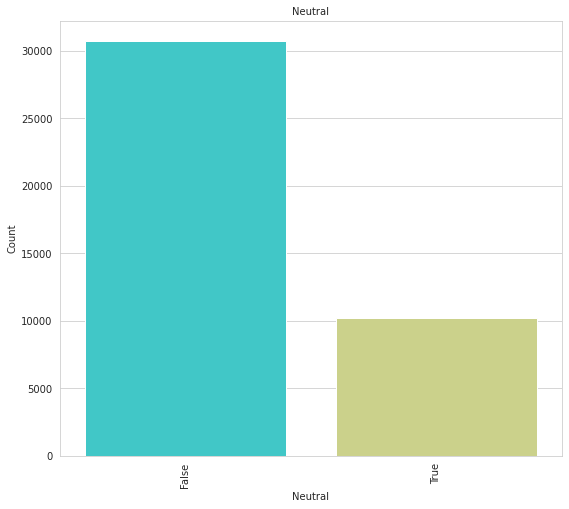

neutral
False    30680
True     10159
Name: neutral, dtype: int64

In [44]:
uni(df,'neutral',palette='rainbow')

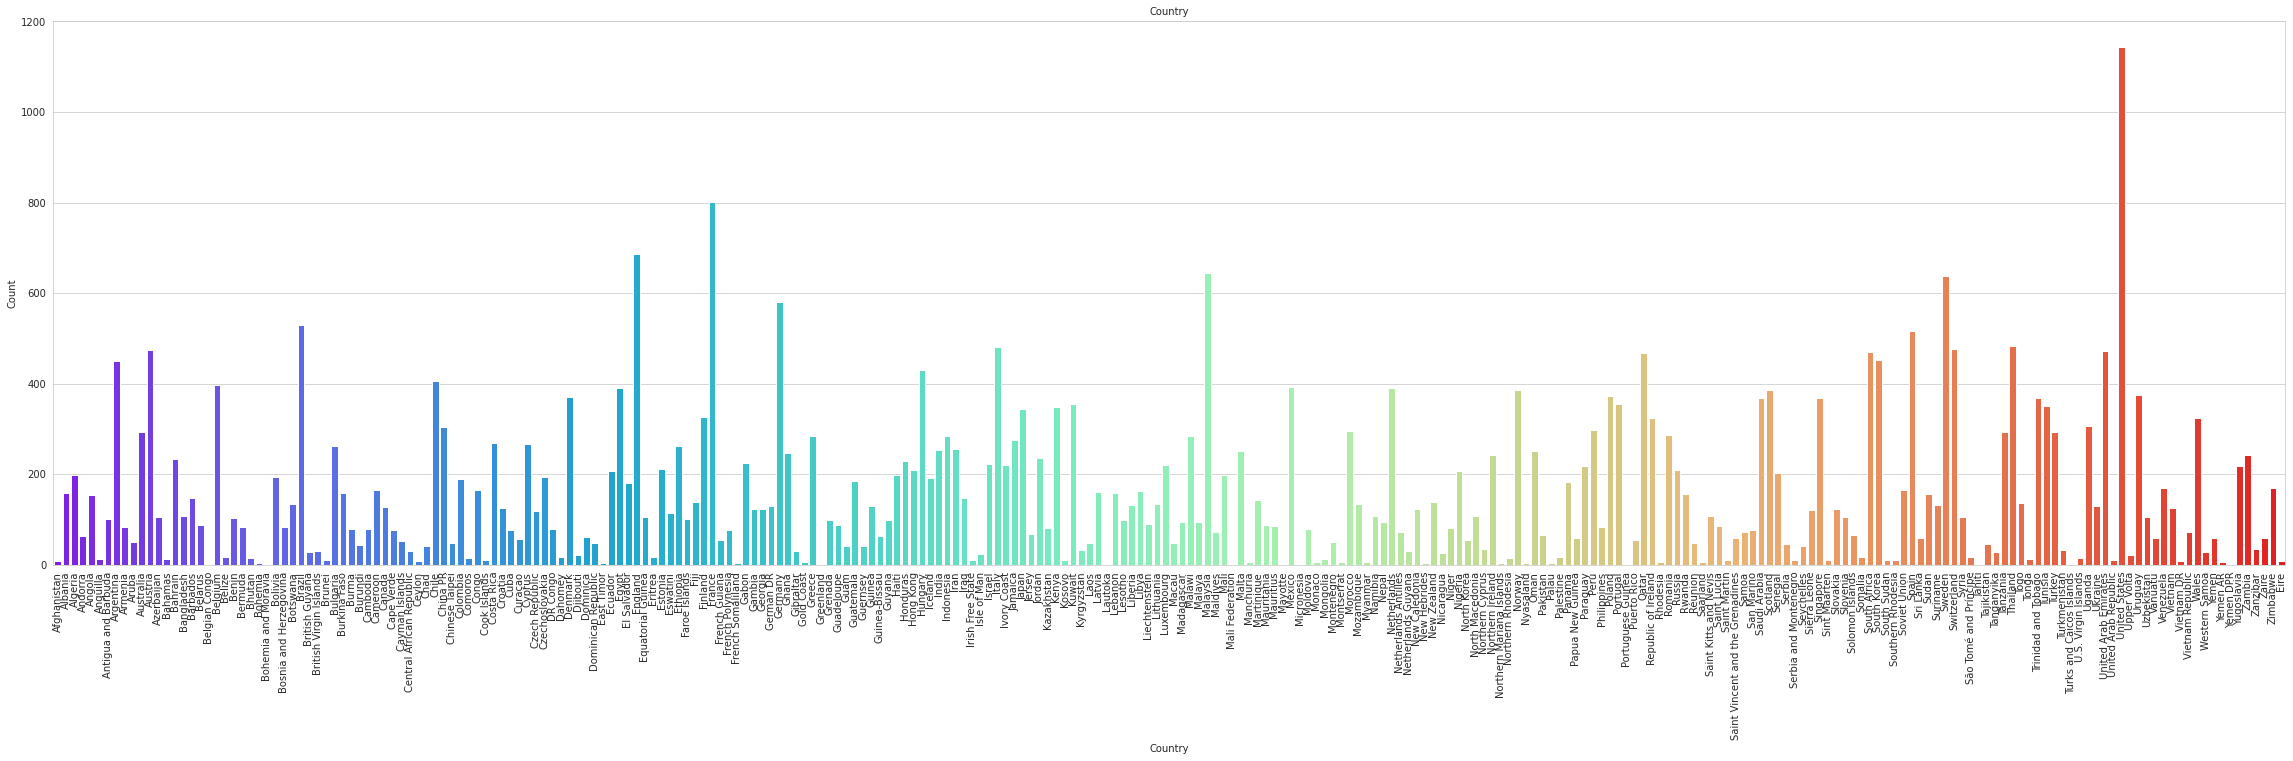

country
Afghanistan      8
Albania        159
Algeria        198
Andorra         62
Angola         153
              ... 
Zambia         241
Zanzibar        34
Zaïre           59
Zimbabwe       170
Éire             7
Name: country, Length: 266, dtype: int64

In [18]:
uni(df,'country',palette='rainbow')

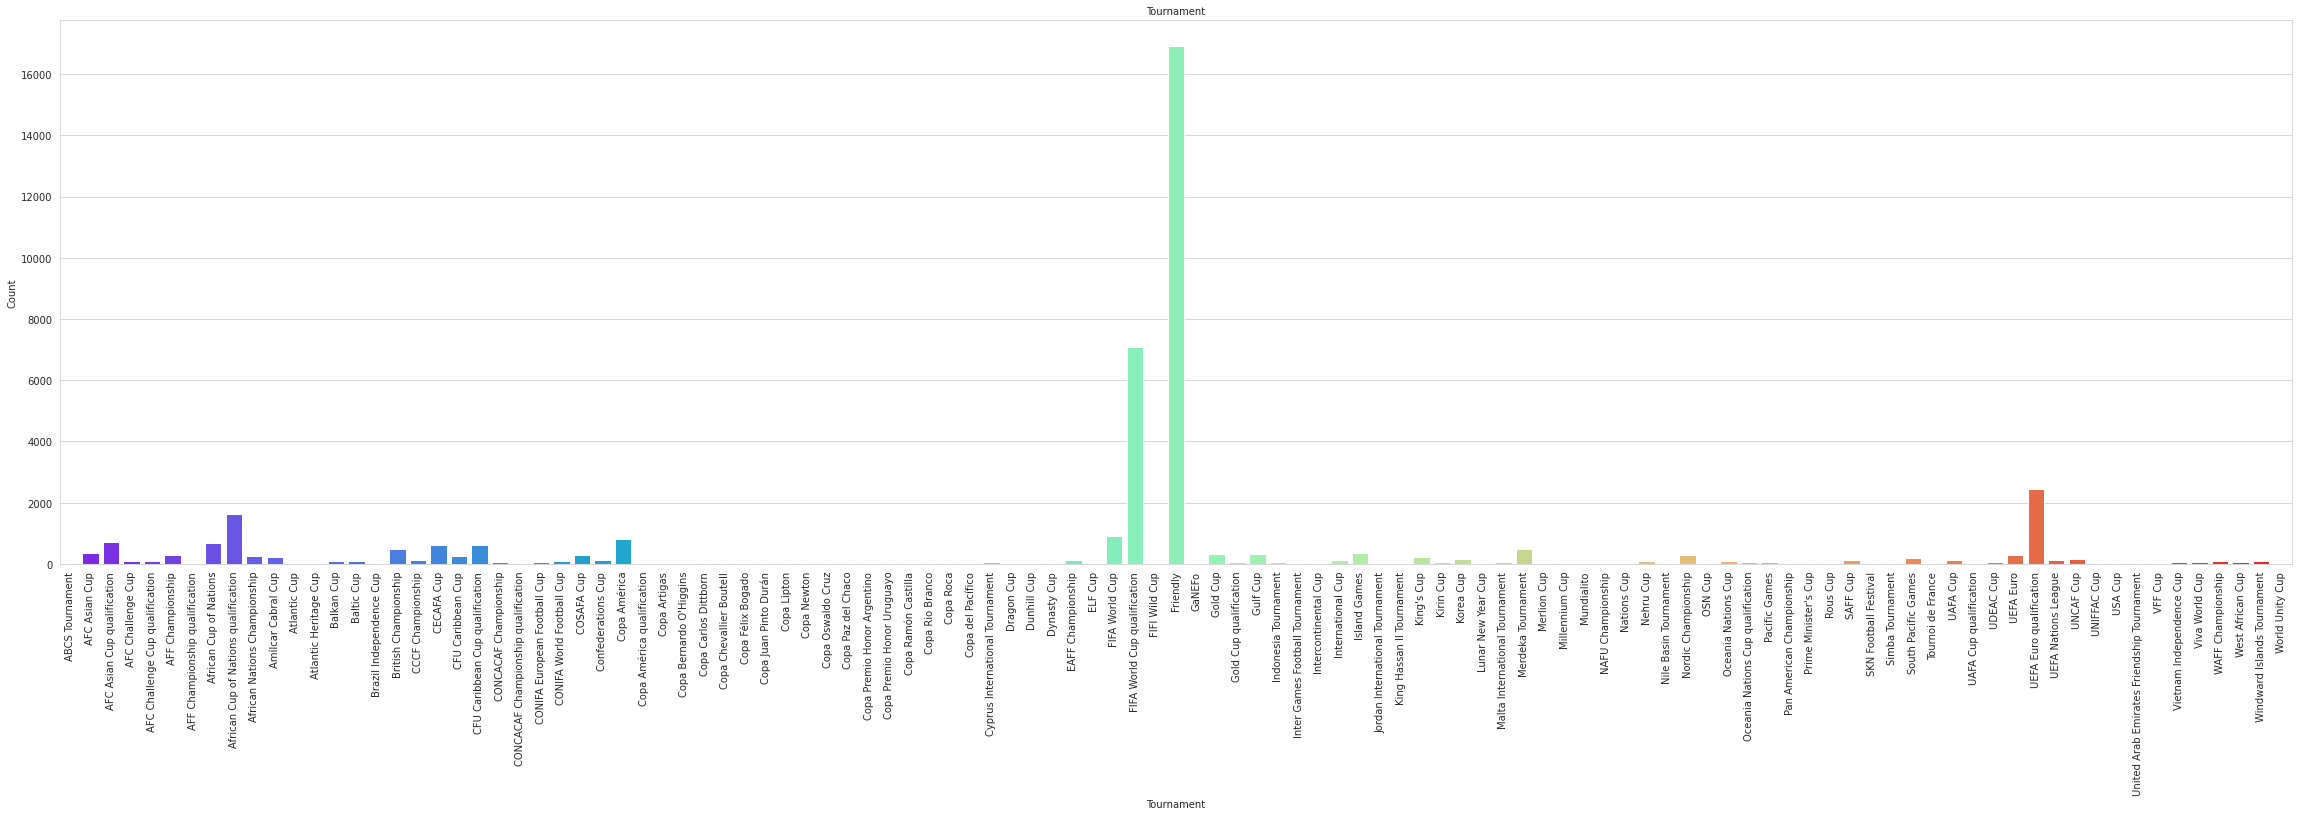

tournament
ABCS Tournament                     20
AFC Asian Cup                      370
AFC Asian Cup qualification        724
AFC Challenge Cup                  100
AFC Challenge Cup qualification     92
                                  ... 
Viva World Cup                      56
WAFF Championship                   97
West African Cup                    54
Windward Islands Tournament        101
World Unity Cup                      4
Name: tournament, Length: 109, dtype: int64

In [19]:
uni(df,'tournament',palette='rainbow')

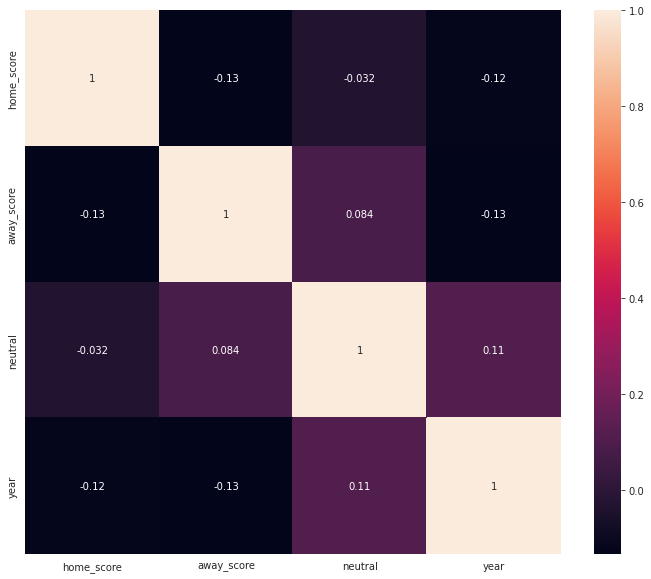

In [20]:
#Bivariate Analysis
#Plotting a heat map to show correlation for all our variables

plt.figure(figsize=(12, 10))

heat_map =df.corr()

sns.heatmap(heat_map,xticklabels = heat_map.columns.values,yticklabels = heat_map.columns.values,annot = True);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


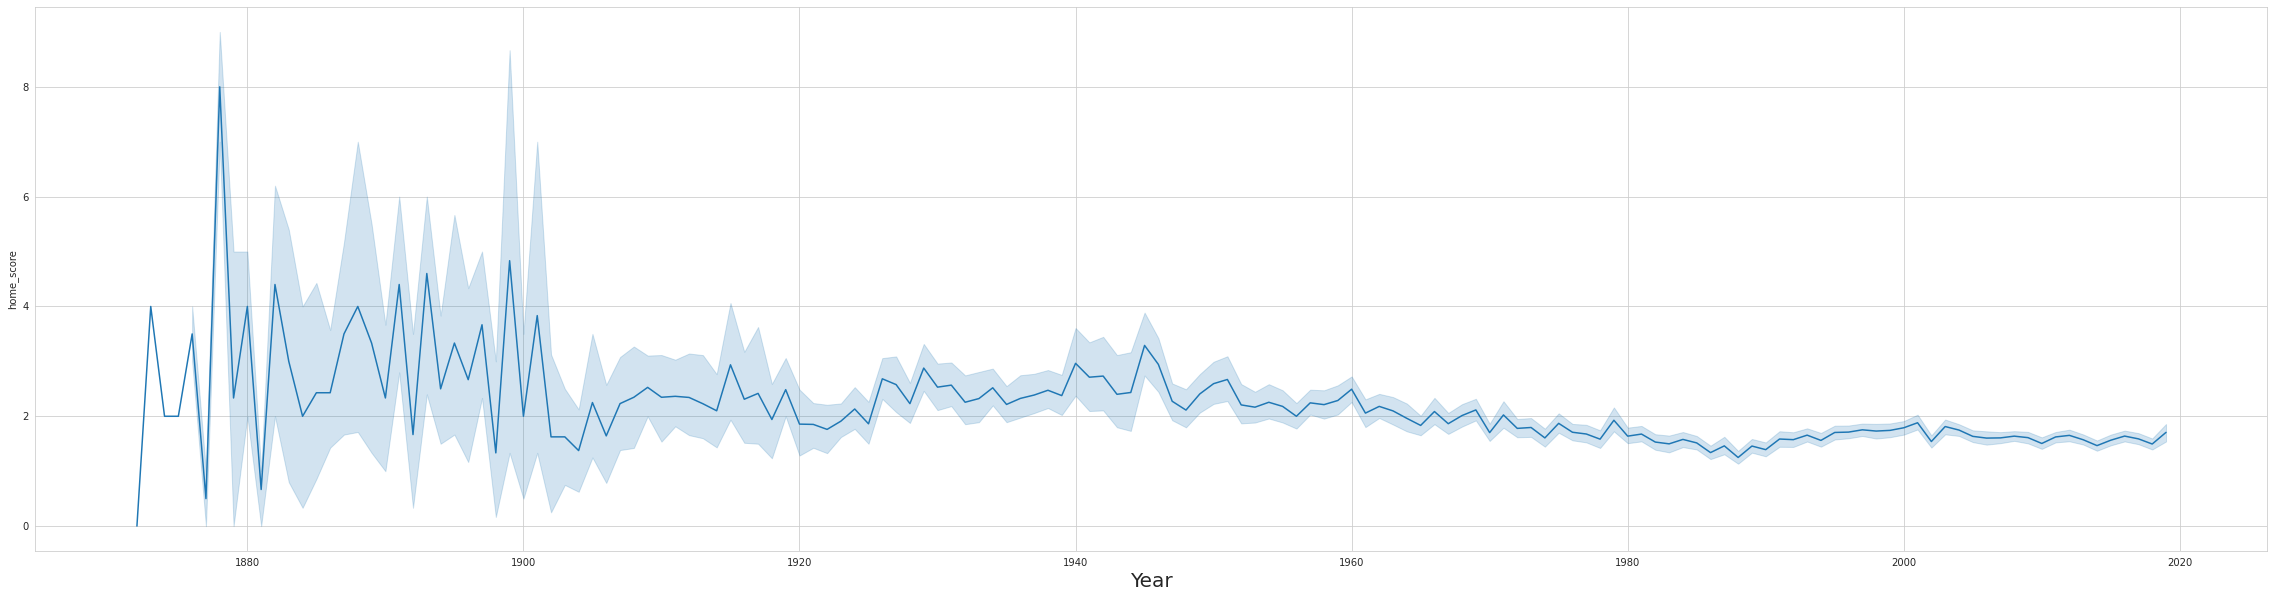

In [21]:
plt.figure(figsize=(40, 10))
sns.lineplot(df['year'],df['home_score'])
plt.xlabel("Year", fontsize=20)
#plt.xticks(rotation=90)
plt.show()

In [22]:
#Loading the 2nd dataset

df2=pd.read_csv('/content/fifa_ranking.csv')
df2.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [23]:
df2.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


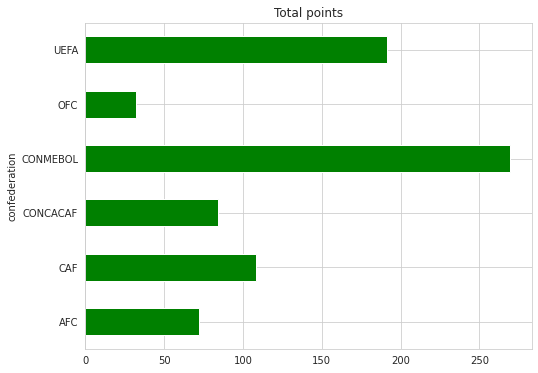

In [24]:
#Checking which confederation has the better point performance

plt.figure(figsize=(8, 6))
con_fed=df2.groupby(['confederation'])['total_points'].mean()
con_fed.plot(kind='barh', title='Total points',color='green')

## 7. Future Engineering

In [40]:

#Finding unique values for each column


for col in df:
  print(df.nunique())


#df.home_team.unique()


date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
year            148
dtype: int64
date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
year            148
dtype: int64
date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
year            148
dtype: int64
date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
year            148
dtype: int64
date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country 

In [25]:

#one-hot encoding
encoded_data=pd.get_dummies(df,columns = ['tournament'])
print(encoded_data)

             date  ... tournament_World Unity Cup
0      1872-11-30  ...                          0
1      1873-03-08  ...                          0
2      1874-03-07  ...                          0
3      1875-03-06  ...                          0
4      1876-03-04  ...                          0
...           ...  ...                        ...
40834  2019-07-18  ...                          0
40835  2019-07-18  ...                          0
40836  2019-07-19  ...                          0
40837  2019-07-19  ...                          0
40838  2019-07-20  ...                          0

[40839 rows x 118 columns]


In [ ]:
# def update_rank(country, year):
#     home_rank= df2[(df2['country_full']==country) & (df2['Year']==year)]['rank'].values#.reshape([1])
#     return home_rank

# #Apply the function:
# #Append home rank using the function by creating  a new column

# df['Home_rank'] = df.apply(lambda x: update_rank(x['home_team'], x['Year']), axis=1)

## 8. Checking for Multi-colinearity

In [26]:
##
# Remove other columns, we want to focus on our independent variables only.
independent_only = df.drop(columns=['date', 'city'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations


,home_score,away_score,neutral,year
home_score,1.000000,-0.133412,-0.031660,-0.123567
away_score,-0.133412,1.000000,0.084335,-0.133891
neutral,-0.031660,0.084335,1.000000,0.107900
year,-0.123567,-0.133891,0.107900,1.000000


In [27]:
#computing VIF score for each varibale

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,neutral,year
home_score,1.039692,0.158408,0.003447,0.149309
away_score,0.158408,1.052730,-0.102279,0.171561
neutral,0.003447,-0.102279,1.022066,-0.123549
year,0.149309,0.171561,-0.123549,1.054751


## 9. Implementing the Solution

In [28]:
# Implementing the Solution
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

#assigning columns to be used
X = df2[['rank']].values
y = df2['previous_points'].values

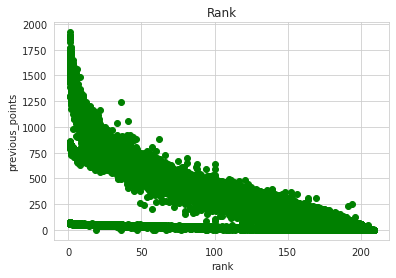

In [30]:
plt.scatter(X, y, color='green') 
plt.title('Rank')
plt.xlabel('rank')
plt.ylabel('previous_points')
plt.show()

Polynomial Regression

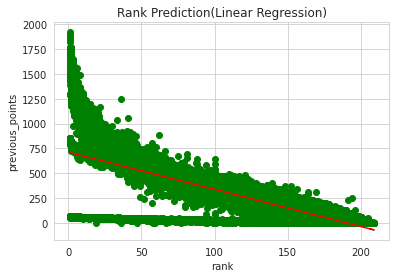

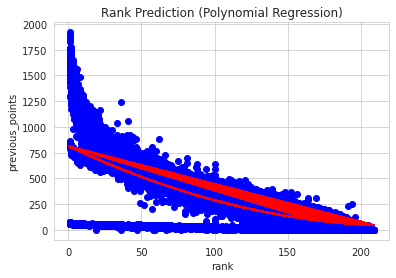

In [35]:
# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='green') 
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Rank Prediction(Linear Regression)')
plt.xlabel('rank')
plt.ylabel('previous_points')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Rank Prediction (Polynomial Regression)')
plt.xlabel('rank')
plt.ylabel('previous_points')
plt.show()

## 10. Cross-validation & RMSE's

In [38]:
##
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, rank_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, rank_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, rank_predict)))


Mean Absolute Error: 129.85280517139353
Mean Squared Error: 43254.77091019191
Root Mean Squared Error: 207.97781350469072


## 11. Residual Plotting & Heteroscedasticity Test

In [36]:
##
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# This is our prediction for admission based on our model
rank_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(rank_predict, Y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()


-1.7553125848692606

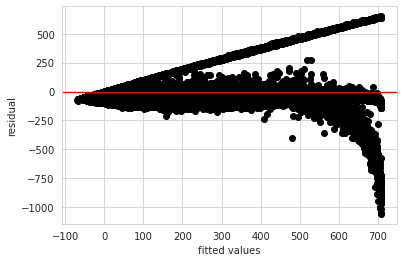

In [37]:
#residual plotting
plt.scatter(rank_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

## 12. Challenging the Solution

In [ ]:
# Further research and improvement on how to merge both datasets to include ranks of both home and away teams 
